<a href="https://colab.research.google.com/github/Shin72111/learn-ml-dl/blob/master/linkedin/face-recognition/Ch07/face_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install face-recognition

     |████████████████████████████████| 100.2MB 363kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566176 sha256=dbc589c750c2c1c33cf8e5a3a958b01299821da7cc2cf5f63b5041f43099c3bb
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


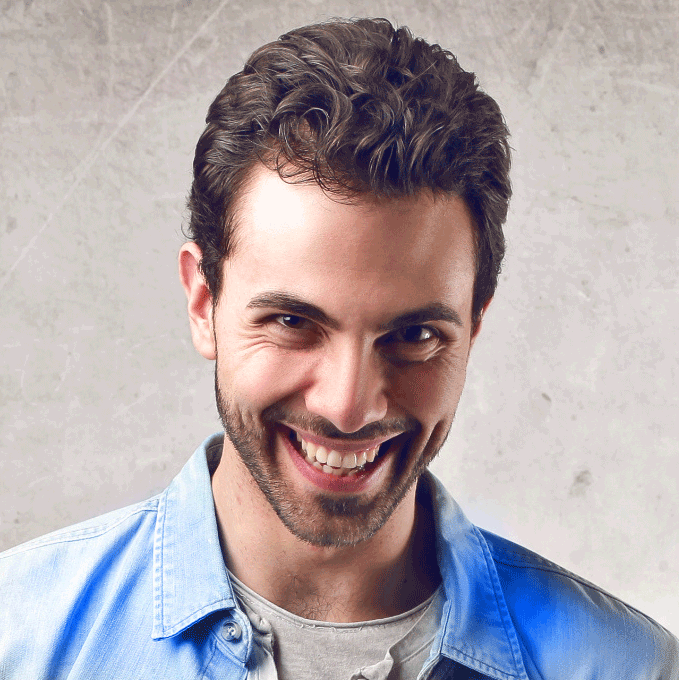

In [5]:
import face_recognition
from pathlib import Path
from PIL import Image
from IPython.core.display import display

# Load the image of the person we want to find similar people for
known_image = face_recognition.load_image_file('test_face.jpg')

# Encode the known image
known_image_encoding = face_recognition.face_encodings(known_image)[0]

# Variables to keep track of the most similar face match we've found
best_face_distance = 1.0
best_face_image = None

# Loop over all the images we want to check for similar people
for image_path in Path("people").glob("*.png"):
    # Load an image to check
    unknown_image = face_recognition.load_image_file(image_path)

    # Get the location of faces and face encodings for the current image
    face_encodings = face_recognition.face_encodings(unknown_image)

    # Get the face distance between the known person and all the faces in this image
    face_distance = face_recognition.face_distance(face_encodings, known_image_encoding)[0]

    # If this face is more similar to our known image than we've seen so far, save it
    if face_distance < best_face_distance:
        # Save the new best face distance
        best_face_distance = face_distance
        # Extract a copy of the actual face image itself so we can display it
        best_face_image = unknown_image

# Display the face image that we found to be the best match!
pil_image = Image.fromarray(best_face_image)
pil_image.show()
display(pil_image)
